#Examples for Week 3: Clustering Indo-European Languages
Dartmouth College, LING48, Spring 2023<br>
Rolando Coto-Solano (Rolando.A.Coto.Solano@dartmouth.edu)<br>

Based on Keith Johnson's exercise:<br>https://doc.lagout.org/science/0_Computer%20Science/Computational%20Linguistics/Statistics/johnson2008-quantitative_methods_in_linguistics/6historical.pdf


In [7]:
# Libraries needed for clustering
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [8]:
# Generation of input file (dyen-ie.csv)

csvOutput = ""
csvOutput += "lang,animal,bark,bird,black,breathe,w6,w7,w8,w9,w10,w11,w12,w13,w14\n"
csvOutput += "Dutch,1,3,4,1,2,3,3,2,1,2,3,1,1,2\n"
csvOutput += "Danish,1,1,4,1,5,3,3,2,1,4,3,1,1,2\n"
csvOutput += "Swedish,1,1,4,1,5,3,3,2,1,4,3,1,1,2\n"
csvOutput += "German,1,2,4,1,2,3,3,2,1,2,3,1,1,2\n"
csvOutput += "English,5,1,7,6,7,3,3,3,1,2,3,1,1,2\n"
csvOutput += "Slovenian,2,3,5,3,1,2,3,2,1,3,1,2,4,3\n"
csvOutput += "Russian,2,3,5,3,1,2,3,2,2,3,1,2,4,3\n"
csvOutput += "Polish,2,3,5,3,1,2,3,2,1,3,2,2,4,3\n"
csvOutput += "Czech,2,3,5,3,1,2,3,2,1,3,1,2,4,3\n"
csvOutput += "Greek,2,6,1,7,3,1,3,2,1,5,3,2,7,6\n"
csvOutput += "Kashmiri,3,7,3,2,4,2,2,3,1,7,3,2,5,4\n"
csvOutput += "Gujarati,3,4,3,2,4,2,2,1,1,3,5,4,5,7\n"
csvOutput += "Marathi,3,4,3,2,4,2,2,1,4,3,3,2,6,4\n"
csvOutput += "Hindi,3,4,3,2,4,2,2,1,1,3,3,2,5,4\n"
csvOutput += "Waziri,3,5,6,5,4,4,1,2,3,6,4,2,2,5\n"
csvOutput += "Portuguese,4,3,2,4,6,2,3,2,1,1,3,2,3,1\n"
csvOutput += "Spanish,4,3,2,4,6,2,3,2,1,1,3,2,3,1\n"
csvOutput += "Italian,4,3,2,4,6,2,3,2,1,1,3,2,3,1\n"
csvOutput += "French,4,3,2,4,6,2,3,2,1,1,3,2,3,1"

f = open("dyen-ie.csv", "w")
f.write(csvOutput)
f.close()

In [10]:
# Import the dataset
url = "dyen-ie.csv"
df = pd.read_csv(url)
df = df.set_index('lang')

In [12]:
# Calculate the distance between each sample
Z = linkage(df, 'single')
Z

array([[ 1.        ,  2.        ,  0.        ,  2.        ],
       [ 5.        ,  8.        ,  0.        ,  2.        ],
       [15.        , 16.        ,  0.        ,  2.        ],
       [17.        , 21.        ,  0.        ,  3.        ],
       [18.        , 22.        ,  0.        ,  4.        ],
       [ 0.        ,  3.        ,  1.        ,  2.        ],
       [ 7.        , 20.        ,  1.        ,  3.        ],
       [ 6.        , 25.        ,  1.        ,  4.        ],
       [12.        , 13.        ,  3.16227766,  2.        ],
       [19.        , 24.        ,  3.74165739,  4.        ],
       [11.        , 27.        ,  4.12310563,  3.        ],
       [26.        , 28.        ,  4.58257569,  8.        ],
       [29.        , 30.        ,  4.58257569, 11.        ],
       [10.        , 31.        ,  5.38516481, 12.        ],
       [23.        , 32.        ,  5.47722558, 16.        ],
       [ 4.        , 33.        ,  6.63324958, 17.        ],
       [14.        , 34.

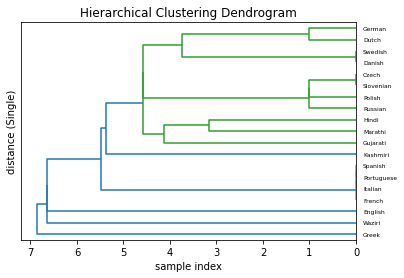

In [13]:
# Make the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Single)')
dendrogram(Z, labels=df.index, orientation="left", truncate_mode='level', leaf_rotation=0, leaf_font_size=6)
plt.savefig('ie-dendrogram.pdf')

In [14]:
# Download PDF file
from google.colab import files
files.download('ie-dendrogram.pdf')

ModuleNotFoundError: No module named 'google'

# Optional: What's in the Z matrix?

These are the first lines of the Z matrix:

`[ 1.        ,  2.        ,  0.        ,  2.        ],`<br>
`[ 5.        ,  8.        ,  0.        ,  2.        ],`<br>
`[15.        , 16.        ,  0.        ,  2.        ],`<br>
`[17.        , 21.        ,  0.        ,  3.        ]`

The first row has the index of the first element to be merged. As you can see, the `df` dataframe goes from index 0-18. So, "1" means that you're merging the element in index 1 of `df`, which is Danish. The second row has the index of the second element to be merged. In this case, the element in index 2 is Swedish. The third row has the distance between these two elements. In this case, the distance is zero. The fourth row has the number of elements in each merge. Because we merged Danish and Swedish, there are two elements in this cluster.

Here's the most important part: Since you already have occupied the indexes 0 to 18, this new cluster will be assigned the next free index. In this case, this new (Danish+Swedish) cluster will be in index 19.

Items in indexes 5 and 8 (Slovenian and Czech) are very close together, so they get merged. This is shown in the second line of `Z`. The next available index is 20, so item 20 will be the cluster that contains [5,8].

And so on. For example, items in indexes 15 and 16 (Portuguese and Spanish) get merged. The next available index is 21, so item 21 will be the cluster that contains [15,16].

And here comes the interesting part. Look at the fourth line of the `Z` matrix:
[17,21,0,3]
The first number is the first element to be merged (17:Italian). The second number gives us the second element to be merged. This is the cluster 21 that was created in the third line (15+16, Portuguese+Spanish). The third element is the distance between the two elements that are being merged (i.e. the distance between Portuguese, Spanish and Italian is zero). Finally, the number 3 represents the number of elements in this cluster.

And so on. One line at a time, Z will build the clusters and the distances between them.

You can find out more in the documentation of SciPy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [ ]:
# Function from Keith Arora-Williams
# https://stackoverflow.com/questions/7664826/how-to-get-flat-clustering-corresponding-to-color-clusters-in-the-dendrogram-cre/43170608#43170608

labels = df.index
row_clusters = Z

def extract_levels(row_clusters, labels):
    clusters = {}
    for row in range(row_clusters.shape[0]):
        cluster_n = row + len(labels)
        # which clusters / labels are present in this row
        glob1, glob2 = row_clusters[row, 0], row_clusters[row, 1]

        # if this is a cluster, pull the cluster
        this_clust = []
        for glob in [glob1, glob2]:
            if glob > (len(labels)-1):
                this_clust += clusters[glob]
            # if it isn't, add the label to this cluster
            else:
                this_clust.append(glob)

        clusters[cluster_n] = this_clust
    return clusters

extract_levels(row_clusters, labels)

# Clustering Using K-Means

In [5]:
# Get the names of the languages
languageNames = list(df.index)
languageNames

NameError: name 'df' is not defined

In [6]:
#Use a k-means algorithm to cluster the plays according to lexical similarity
from sklearn.cluster import KMeans

# Make 10 clusters - add random state to make results reproducible
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', random_state= 36)
model.fit(df)

# Labels to which each KMeans belongs
print(model.labels_)

NameError: name 'df' is not defined

In [ ]:
for i in range(0, len(languageNames)): 
  print(languageNames[i] + ": " + str(model.labels_[i]))